In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
np.random.seed(42)
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
plt.switch_backend('agg')
import seaborn as sns
sns.set(style='whitegrid')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,auc
%matplotlib inline

In [29]:
!pip install xlrd

In [2]:
df=pd.read_excel('./datasets/fashion_data_2018_2022.xls')

In [3]:
df.head()

,product_id,product_name,gender,category,pattern,color,age_group,season,price,material,sales_count,reviews_count,average_rating,out_of_stock_times,brand,discount,last_stock_date,wish_list_count,month_of_sale,year_of_sale
0,1001,Biker Jacket,Male,Shirt,Geometric,White,25-35,Spring,70.36,Synthetic,75,65,4.9,3,ZARA,0.20,2018-01-28,211,1,2018
1,1002,Business Shirt,Male,Jacket,Polka Dots,Beige,18-24,Summer,91.59,Wool,296,25,3.5,6,ZARA,0.00,2018-01-28,211,1,2018
2,1003,Wool Jacket,Female,Dress,Geometric,Brown,18-24,All,129.52,Wool,50,32,4.3,4,ZARA,0.05,2018-01-07,64,1,2018
3,1004,Summer Dress,Male,Shorts,Plain,White,25-35,All,116.01,Cotton,435,73,4.6,3,ZARA,0.10,2018-01-01,171,1,2018
4,1005,Casual Jeans,Male,Shirt,Plain,Beige,35-45,Winter,125.48,Viscose,79,36,3.6,4,ZARA,0.00,2018-01-28,126,1,2018


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   product_id          660 non-null    int64         
 1   product_name        660 non-null    object        
 2   gender              660 non-null    object        
 3   category            660 non-null    object        
 4   pattern             660 non-null    object        
 5   color               660 non-null    object        
 6   age_group           660 non-null    object        
 7   season              660 non-null    object        
 8   price               660 non-null    float64       
 9   material            660 non-null    object        
 10  sales_count         660 non-null    int64         
 11  reviews_count       660 non-null    int64         
 12  average_rating      660 non-null    float64       
 13  out_of_stock_times  660 non-null    int64         

In [33]:
df.isnull().sum()

product_id            0
product_name          0
gender                0
category              0
pattern               0
color                 0
age_group             0
season                0
price                 0
material              0
sales_count           0
reviews_count         0
average_rating        0
out_of_stock_times    0
brand                 0
discount              0
last_stock_date       0
wish_list_count       0
month_of_sale         0
year_of_sale          0
dtype: int64

In [34]:
categorical=df.select_dtypes(include='object')
numerical=df.select_dtypes(exclude=['object','datetime64[ns]'])

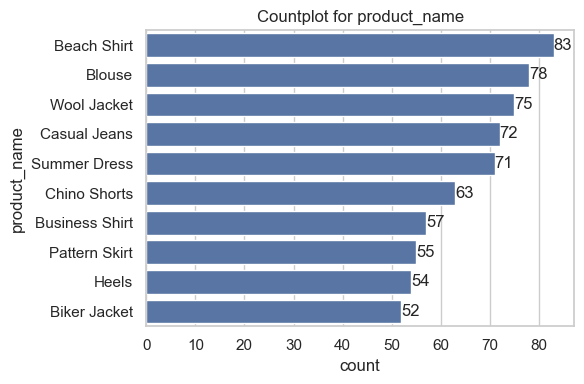

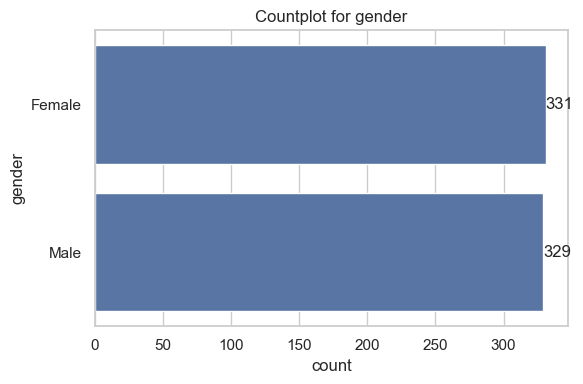

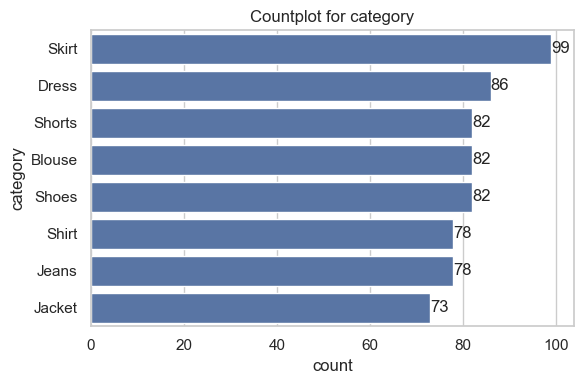

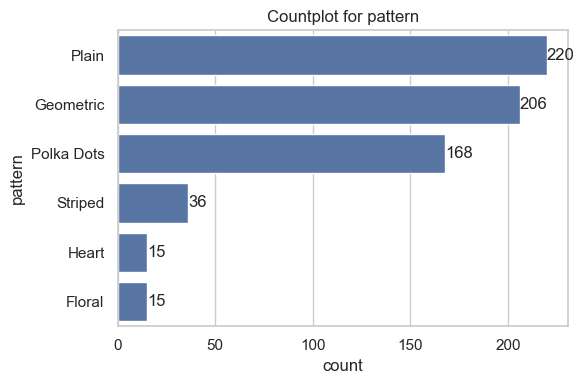

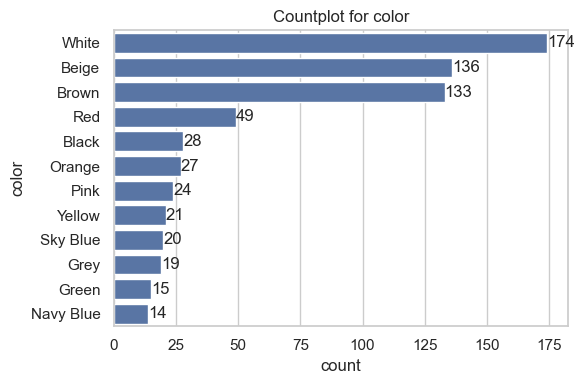

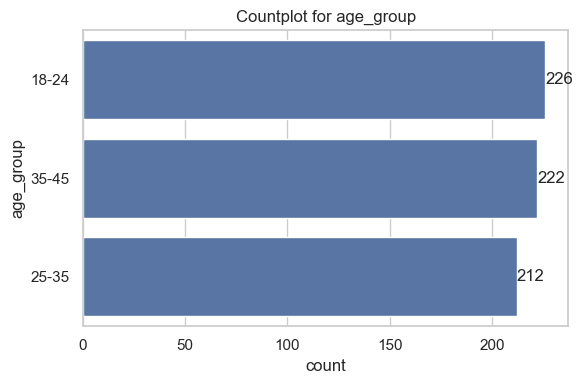

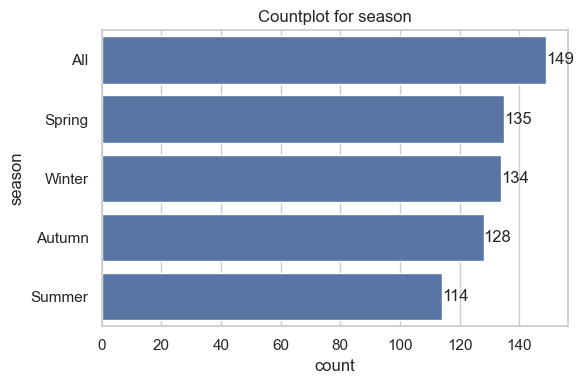

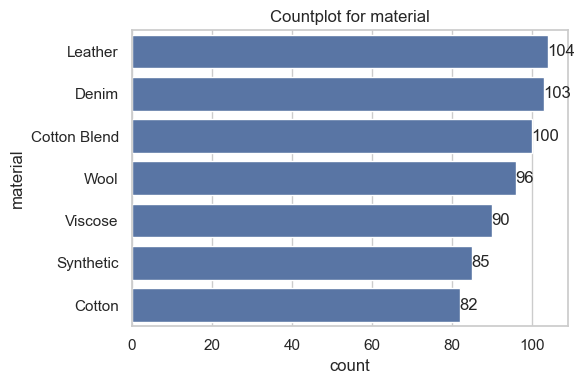

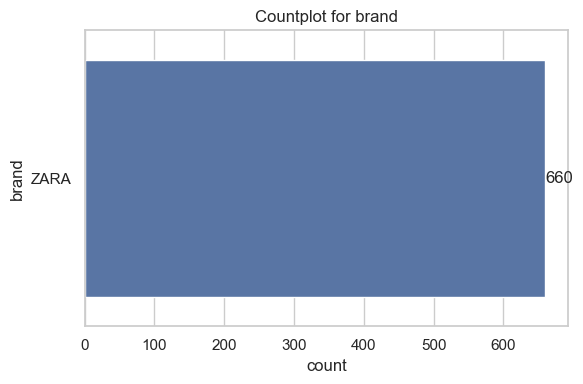

In [35]:
for col in categorical:
    plt.figure(figsize=(6,4))
    ax=sns.countplot(y=col,data=df,order=df[col].value_counts().index)
    ax.bar_label(ax.containers[0])
    plt.title(f'Countplot for {col}')
    plt.tight_layout()
    plt.show()

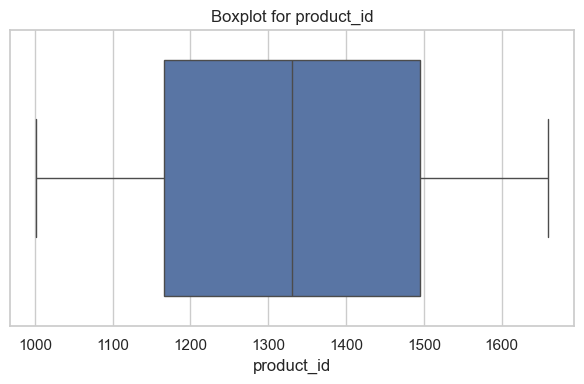

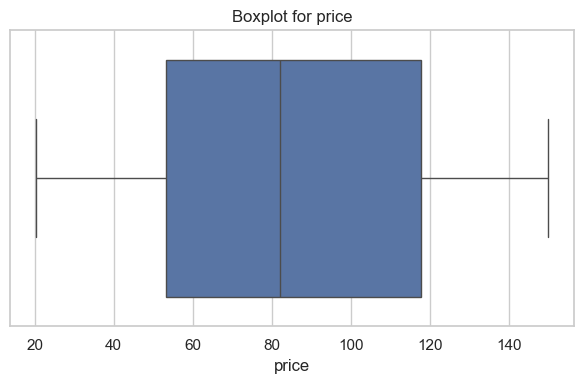

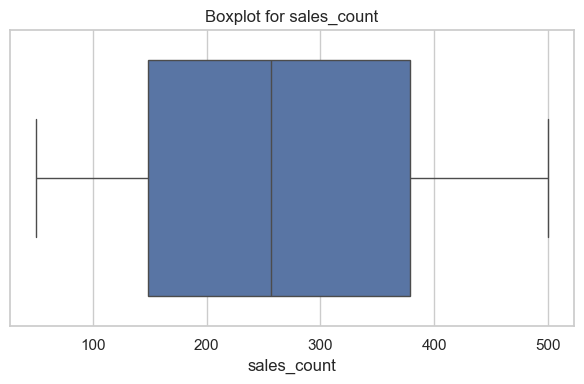

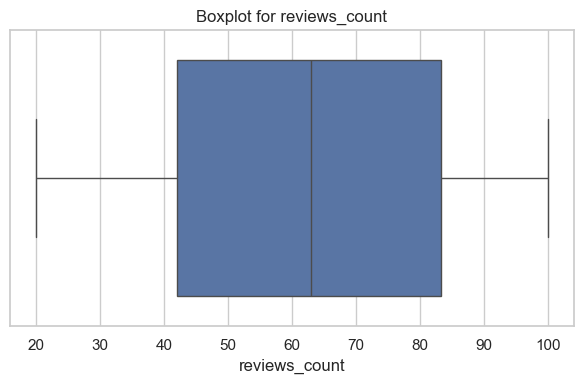

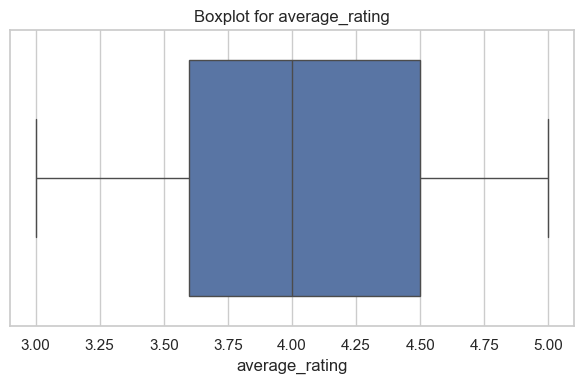

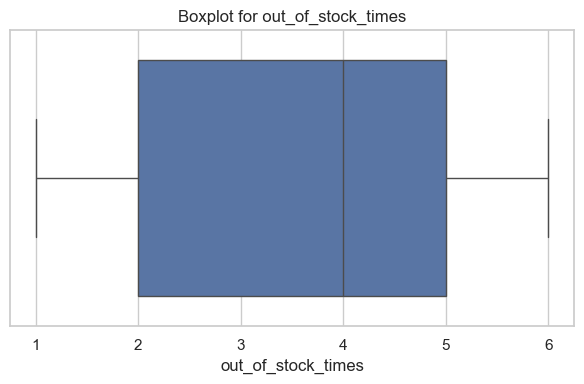

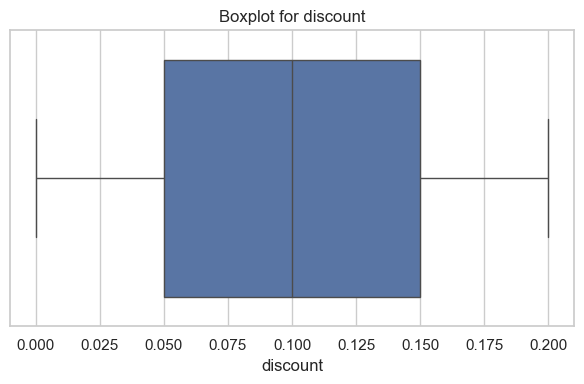

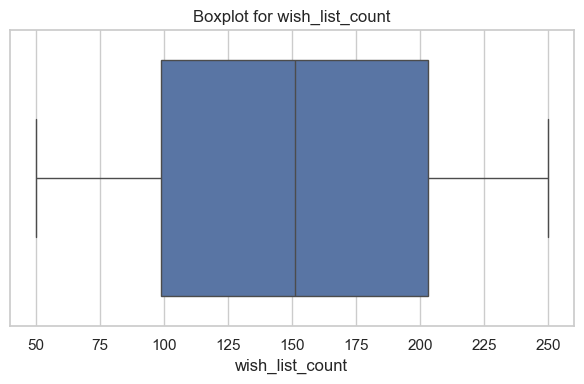

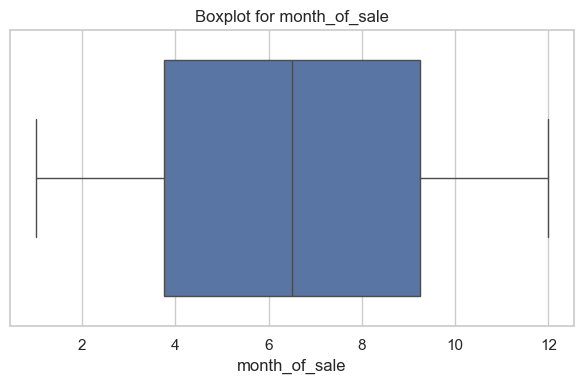

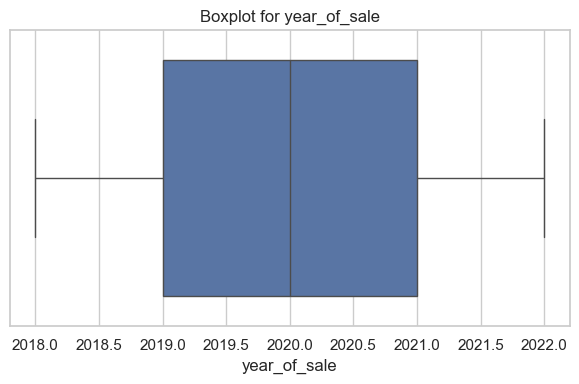

In [36]:
for col in numerical:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.tight_layout()
    plt.show()

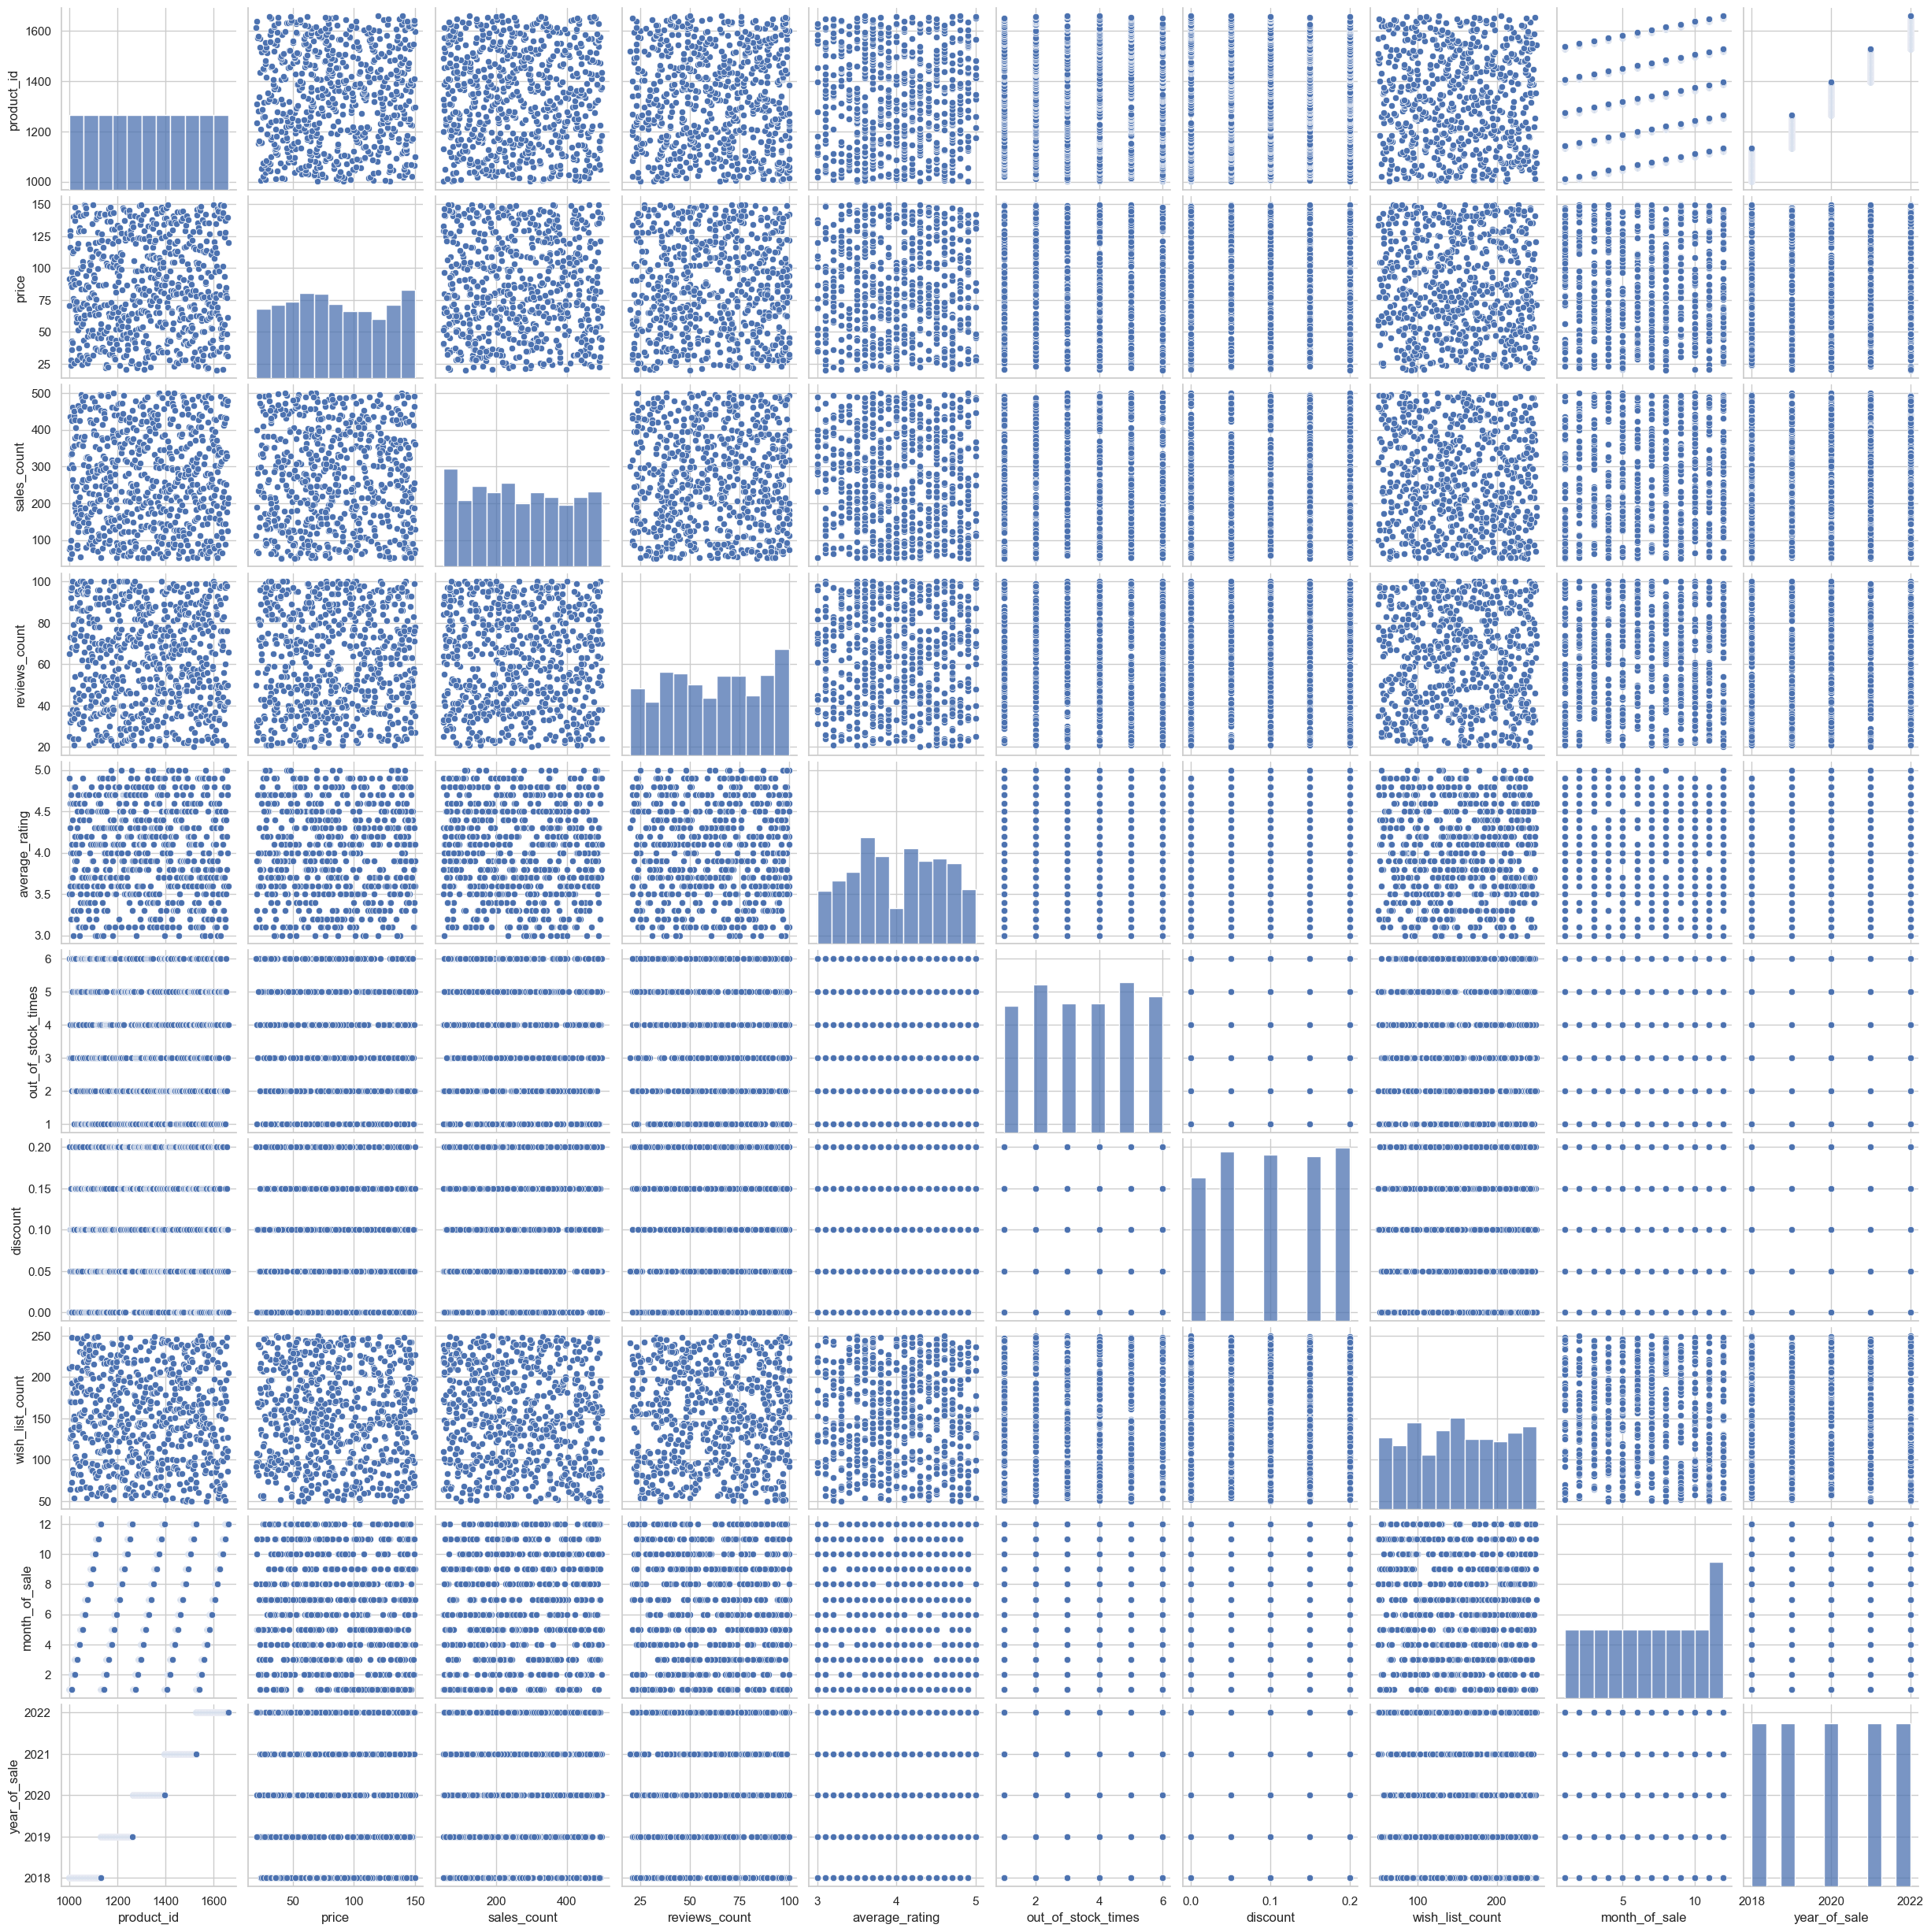

In [37]:
sns.pairplot(numerical)
plt.show()

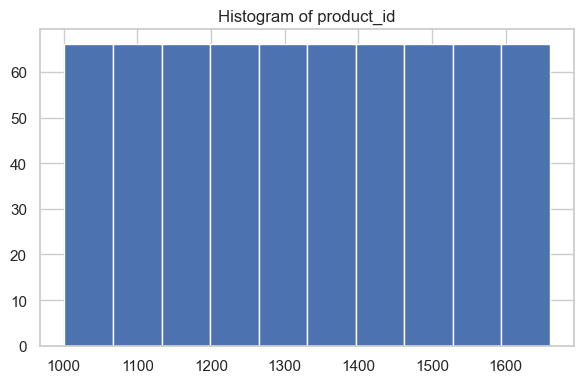

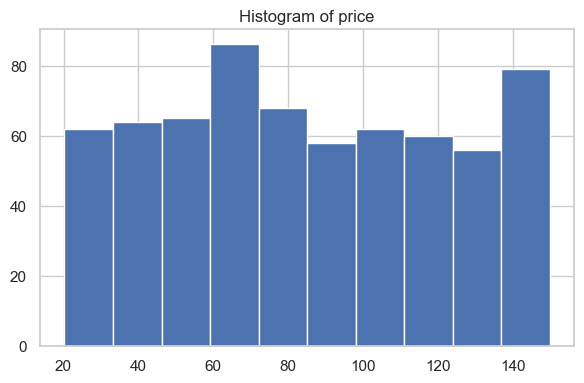

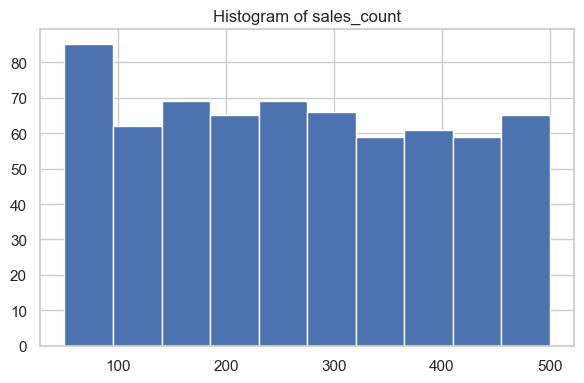

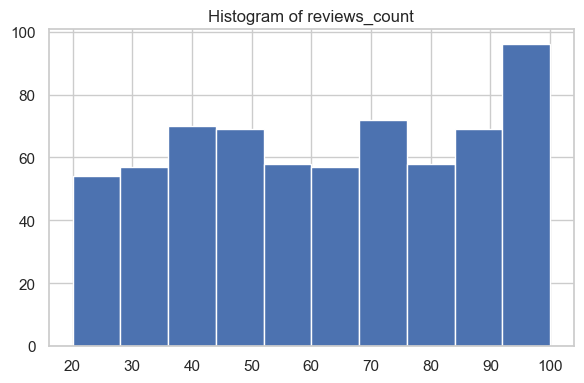

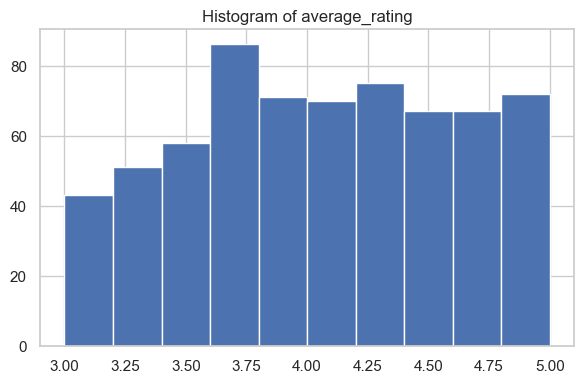

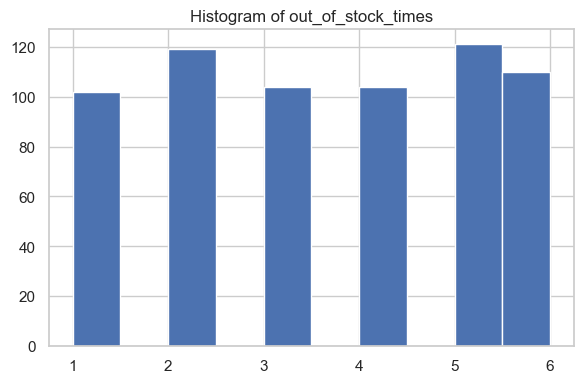

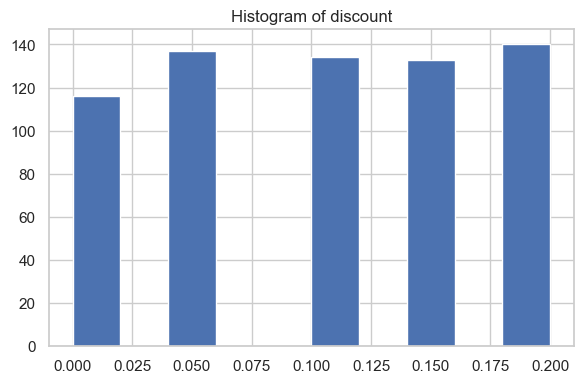

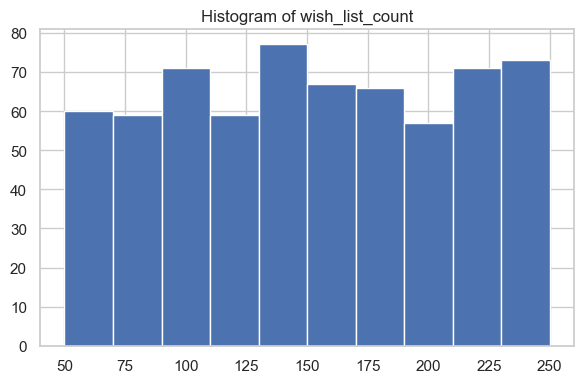

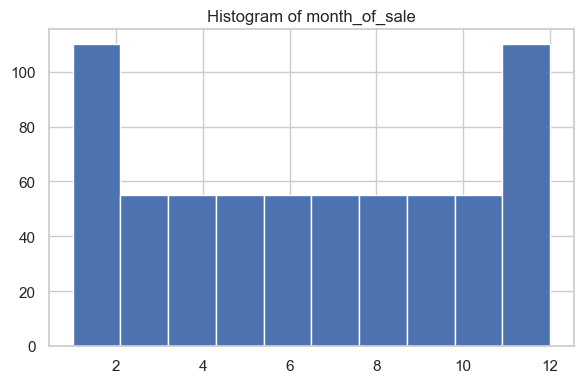

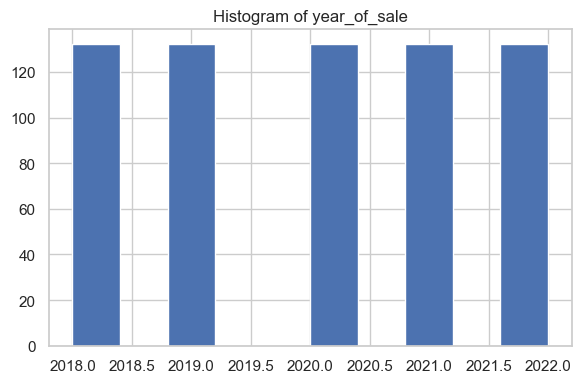

In [38]:
for col in numerical:
    plt.figure(figsize=(6,4))
    df[col].hist()
    plt.title(f'Histogram of {col}')
    plt.tight_layout()
    plt.show()

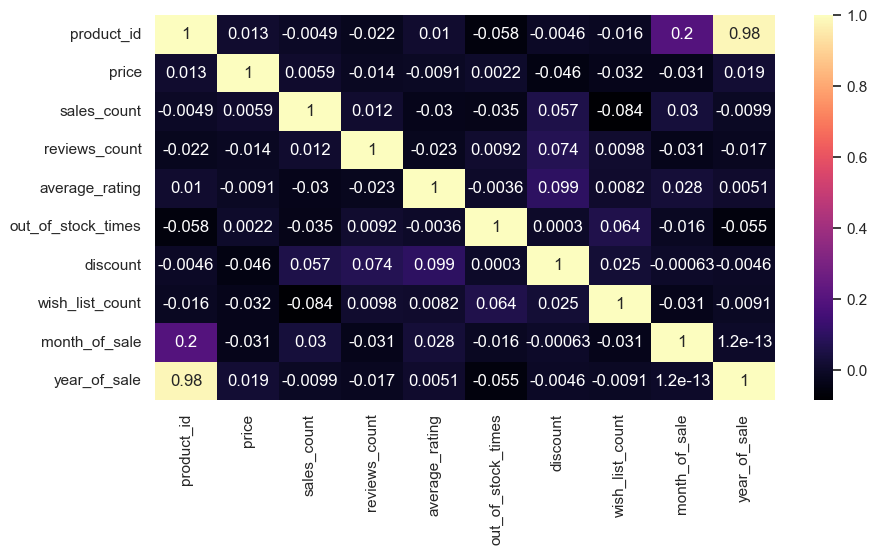

In [39]:
plt.figure(figsize=(10,5))
sns.heatmap(numerical.corr(),annot=True,cmap='magma')
plt.show()

In [40]:
categorical.head()

,product_name,gender,category,pattern,color,age_group,season,material,brand
0,Biker Jacket,Male,Shirt,Geometric,White,25-35,Spring,Synthetic,ZARA
1,Business Shirt,Male,Jacket,Polka Dots,Beige,18-24,Summer,Wool,ZARA
2,Wool Jacket,Female,Dress,Geometric,Brown,18-24,All,Wool,ZARA
3,Summer Dress,Male,Shorts,Plain,White,25-35,All,Cotton,ZARA
4,Casual Jeans,Male,Shirt,Plain,Beige,35-45,Winter,Viscose,ZARA


In [41]:
y=categorical['category']
categorical.drop('product_name',axis=1,inplace=True)
categorical.drop('category',axis=1,inplace=True)

In [42]:
categorical.head()

,gender,pattern,color,age_group,season,material,brand
0,Male,Geometric,White,25-35,Spring,Synthetic,ZARA
1,Male,Polka Dots,Beige,18-24,Summer,Wool,ZARA
2,Female,Geometric,Brown,18-24,All,Wool,ZARA
3,Male,Plain,White,25-35,All,Cotton,ZARA
4,Male,Plain,Beige,35-45,Winter,Viscose,ZARA


In [43]:
categorical=pd.get_dummies(categorical,drop_first=True)

In [44]:
categorical.head()

,gender_Male,pattern_Geometric,pattern_Heart,pattern_Plain,pattern_Polka Dots,pattern_Striped,color_Black,color_Brown,color_Green,color_Grey,...,season_Autumn,season_Spring,season_Summer,season_Winter,material_Cotton Blend,material_Denim,material_Leather,material_Synthetic,material_Viscose,material_Wool
0,True,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
1,True,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
2,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False


In [45]:
for col in categorical.columns:
  if categorical[col].dtype==bool:
    categorical[col]=categorical[col].map({True:1,False:0})


In [46]:
categorical.head()

,gender_Male,pattern_Geometric,pattern_Heart,pattern_Plain,pattern_Polka Dots,pattern_Striped,color_Black,color_Brown,color_Green,color_Grey,...,season_Autumn,season_Spring,season_Summer,season_Winter,material_Cotton Blend,material_Denim,material_Leather,material_Synthetic,material_Viscose,material_Wool
0,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [47]:
model_df=pd.concat([categorical,numerical],axis=1)

In [48]:
model_df.head()

,gender_Male,pattern_Geometric,pattern_Heart,pattern_Plain,pattern_Polka Dots,pattern_Striped,color_Black,color_Brown,color_Green,color_Grey,...,product_id,price,sales_count,reviews_count,average_rating,out_of_stock_times,discount,wish_list_count,month_of_sale,year_of_sale
0,1,1,0,0,0,0,0,0,0,0,...,1001,70.36,75,65,4.9,3,0.20,211,1,2018
1,1,0,0,0,1,0,0,0,0,0,...,1002,91.59,296,25,3.5,6,0.00,211,1,2018
2,0,1,0,0,0,0,0,1,0,0,...,1003,129.52,50,32,4.3,4,0.05,64,1,2018
3,1,0,0,1,0,0,0,0,0,0,...,1004,116.01,435,73,4.6,3,0.10,171,1,2018
4,1,0,0,1,0,0,0,0,0,0,...,1005,125.48,79,36,3.6,4,0.00,126,1,2018


In [49]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender_Male            660 non-null    int64  
 1   pattern_Geometric      660 non-null    int64  
 2   pattern_Heart          660 non-null    int64  
 3   pattern_Plain          660 non-null    int64  
 4   pattern_Polka Dots     660 non-null    int64  
 5   pattern_Striped        660 non-null    int64  
 6   color_Black            660 non-null    int64  
 7   color_Brown            660 non-null    int64  
 8   color_Green            660 non-null    int64  
 9   color_Grey             660 non-null    int64  
 10  color_Navy Blue        660 non-null    int64  
 11  color_Orange           660 non-null    int64  
 12  color_Pink             660 non-null    int64  
 13  color_Red              660 non-null    int64  
 14  color_Sky Blue         660 non-null    int64  
 15  color_

In [50]:
model_df.isnull().sum()

gender_Male              0
pattern_Geometric        0
pattern_Heart            0
pattern_Plain            0
pattern_Polka Dots       0
pattern_Striped          0
color_Black              0
color_Brown              0
color_Green              0
color_Grey               0
color_Navy Blue          0
color_Orange             0
color_Pink               0
color_Red                0
color_Sky Blue           0
color_White              0
color_Yellow             0
age_group_25-35          0
age_group_35-45          0
season_Autumn            0
season_Spring            0
season_Summer            0
season_Winter            0
material_Cotton Blend    0
material_Denim           0
material_Leather         0
material_Synthetic       0
material_Viscose         0
material_Wool            0
product_id               0
price                    0
sales_count              0
reviews_count            0
average_rating           0
out_of_stock_times       0
discount                 0
wish_list_count          0
m

In [51]:
x=model_df.drop('product_id',axis=1)

In [52]:
x.head()

,gender_Male,pattern_Geometric,pattern_Heart,pattern_Plain,pattern_Polka Dots,pattern_Striped,color_Black,color_Brown,color_Green,color_Grey,...,material_Wool,price,sales_count,reviews_count,average_rating,out_of_stock_times,discount,wish_list_count,month_of_sale,year_of_sale
0,1,1,0,0,0,0,0,0,0,0,...,0,70.36,75,65,4.9,3,0.20,211,1,2018
1,1,0,0,0,1,0,0,0,0,0,...,1,91.59,296,25,3.5,6,0.00,211,1,2018
2,0,1,0,0,0,0,0,1,0,0,...,1,129.52,50,32,4.3,4,0.05,64,1,2018
3,1,0,0,1,0,0,0,0,0,0,...,0,116.01,435,73,4.6,3,0.10,171,1,2018
4,1,0,0,1,0,0,0,0,0,0,...,0,125.48,79,36,3.6,4,0.00,126,1,2018


In [53]:
y.head()

0     Shirt
1    Jacket
2     Dress
3    Shorts
4     Shirt
Name: category, dtype: object

In [54]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
x=scaler.fit_transform(x)

In [55]:
x=pd.DataFrame(x,columns=model_df.drop('product_id',axis=1).columns)

In [56]:
x.head()

,gender_Male,pattern_Geometric,pattern_Heart,pattern_Plain,pattern_Polka Dots,pattern_Striped,color_Black,color_Brown,color_Green,color_Grey,...,material_Wool,price,sales_count,reviews_count,average_rating,out_of_stock_times,discount,wish_list_count,month_of_sale,year_of_sale
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.386413,0.055556,0.5625,0.95,0.4,1.00,0.805,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.550123,0.546667,0.0625,0.25,1.0,0.00,0.805,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.842613,0.000000,0.1500,0.65,0.6,0.25,0.070,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.738433,0.855556,0.6625,0.80,0.4,0.50,0.605,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.811459,0.064444,0.2000,0.30,0.6,0.00,0.380,0.0,0.0


In [57]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=4,random_state=0)
kmeans.fit(x)

KMeans(n_clusters=4, random_state=0)

In [58]:
kmeans.cluster_centers_

array([[ 5.56213018e-01, -2.22044605e-16,  5.91715976e-03,
         0.00000000e+00,  9.94082840e-01, -2.77555756e-17,
        -3.46944695e-17,  2.48520710e-01,  2.95857988e-02,
         4.73372781e-02,  1.18343195e-02, -4.85722573e-17,
         6.50887574e-02,  1.00591716e-01,  2.42861287e-17,
         3.07692308e-01,  2.08166817e-17,  2.89940828e-01,
         3.66863905e-01,  2.24852071e-01,  2.01183432e-01,
         1.53846154e-01,  2.18934911e-01,  1.42011834e-01,
         1.77514793e-01,  1.83431953e-01,  1.53846154e-01,
         1.12426036e-01,  8.87573964e-02,  5.43151280e-01,
         4.61130835e-01,  4.85355030e-01,  4.90828402e-01,
         5.11242604e-01,  5.10355030e-01,  4.93017751e-01,
         4.59386767e-01,  5.26627219e-01],
       [ 5.14563107e-01,  1.00000000e+00,  1.73472348e-17,
         2.77555756e-16,  2.77555756e-16, -4.16333634e-17,
        -3.46944695e-17,  1.94174757e-01,  2.91262136e-02,
         4.36893204e-02,  3.88349515e-02, -6.24500451e-17,
         4.85

In [59]:
kmeans.inertia_

2393.4443250488075

In [60]:
y.head()

0     Shirt
1    Jacket
2     Dress
3    Shorts
4     Shirt
Name: category, dtype: object

In [61]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
y=le.fit_transform(y)

In [64]:
labels=kmeans.labels_
correct_labels=sum(y==labels)
print("Result: %d out of %d samples were correctly labeled." %(correct_labels,y.size))

Result: 69 out of 660 samples were correctly labeled.


In [65]:
print('Accuracy score: {0:0.2f}'.format(accuracy_score(y,labels)))

Accuracy score: 0.10
